![alt text](amer_sign2.png "Sign_Language")

In [1]:
#importing libraries
import numpy as np 
import random as rd
import pandas as pd

In [2]:
#data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from PIL import Image

#for the CNN model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.preprocessing.image import ImageDataGenerator

#setting seed for reproducability
from numpy.random import seed
seed(10)
tf.random.set_seed(20)

In [3]:
#Training Data
train = pd.read_csv('sign_mnist_train.csv')
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [4]:
test = pd.read_csv('sign_mnist_test.csv')
test

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7167,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
7168,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
7169,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
7170,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


1)Here the "Label" in the data set represents the signs given in the figure
2)784 - 28x28
3)to construct pixels into image you have to take 1 to 28 pixel as top row 29 to 56 as second row...and stack them togethr and we will get our image


CHECKING MISSING DATA

In [5]:
#summing the number of na in the training set for each column
print(sum(train.isna().sum()))

#summing the number of null values in the training set for each column
print(sum(train.isnull().sum()))

0
0


In [6]:
label = train['label'].values

In [7]:
unique_val = np.array(label)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

PLOT

<Axes: ylabel='count'>

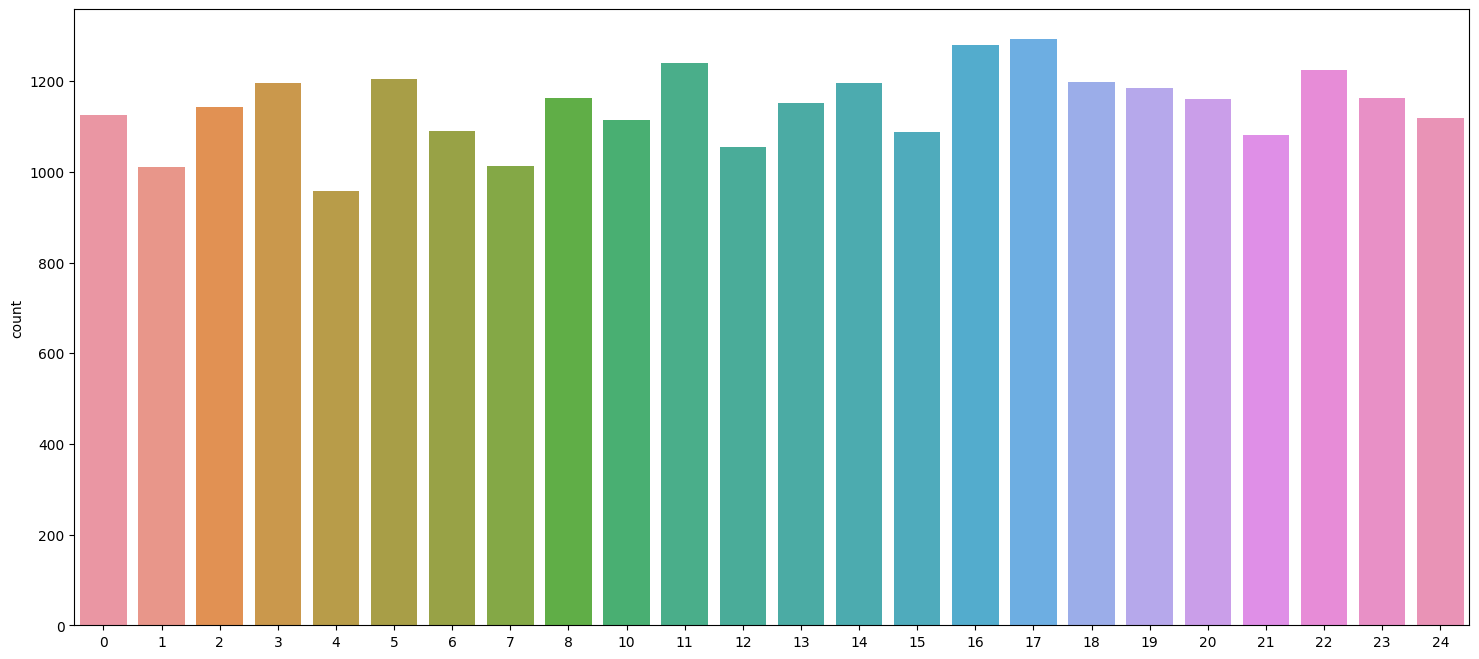

In [8]:
#CountPlot(ie how many values in the dataset)
plt.figure(figsize = (18,8))
sns.countplot(x = label)

In [9]:
#drop labels from training data to get the image pixels
train.drop('label', axis = 1, inplace = True)
train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,189,189,190,190,192,193,193,193,193,194,...,132,165,99,77,52,200,234,200,222,225
27451,151,154,157,158,160,161,163,164,166,167,...,198,198,198,198,198,196,195,195,195,194
27452,174,174,174,174,174,175,175,174,173,173,...,121,196,209,208,206,204,203,202,200,200
27453,177,181,184,185,187,189,190,191,191,190,...,119,56,27,58,102,79,47,64,87,93


In [10]:
#extract image data from each row from csv
images = train.values
images = np.array([np.reshape(i,(28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [11]:
#apply one hot encoding on labels in dataset
from sklearn.preprocessing import LabelBinarizer
label_Binary = LabelBinarizer()
labels = label_Binary.fit_transform(label)
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [12]:
len(labels[0])

24

2


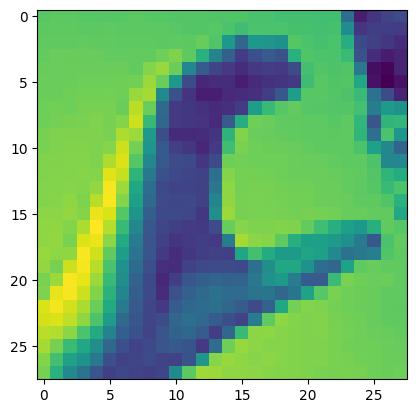

In [13]:
#visualization as color image
index = 2
print(label[index])
plt.imshow(images[index].reshape(28,28))

16


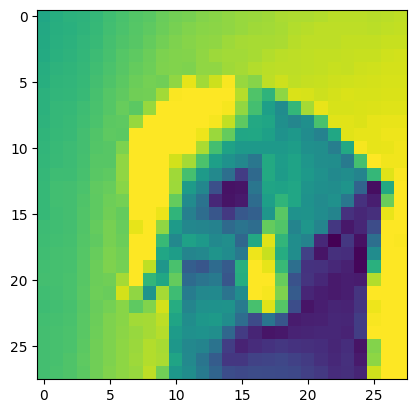

In [14]:
#visualization as color image
index = 5
print(label[index])
plt.imshow(images[index].reshape(28,28))

In [15]:
#openCV to view images from training data
import cv2

for i in range(0,24):
    rand = np.random.randint(0, len(images))
    input_im = images[rand]
    
    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx = 24, fy = 24, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("Sample Image", sample)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

In [16]:
#split data into training and testing 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 50

In [18]:
#Scalling Images
x_train = x_train/255
x_test = x_test/255

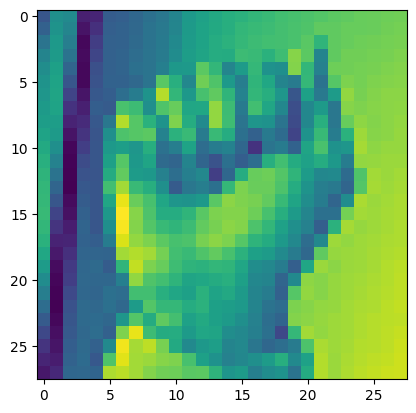

In [19]:
#reshape image according to size required by TF and Keras
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
plt.imshow(x_train[0].reshape(28,28))

In [20]:
#CNN Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

In [21]:
#compile the model
model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(),
             metrics = ['accuracy'])

In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [23]:
#Training Model
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = epochs, batch_size = batch_size)

Epoch 1/50
151/151 [==============================] - 15s 85ms/step - loss: 2.6042 - accuracy: 0.1954 - val_loss: 1.5996 - val_accuracy: 0.5189
Epoch 2/50
151/151 [==============================] - 13s 89ms/step - loss: 1.2353 - accuracy: 0.5854 - val_loss: 0.7663 - val_accuracy: 0.7539
Epoch 3/50
151/151 [==============================] - 14s 89ms/step - loss: 0.6774 - accuracy: 0.7649 - val_loss: 0.4887 - val_accuracy: 0.8346
Epoch 4/50
151/151 [==============================] - 15s 98ms/step - loss: 0.4269 - accuracy: 0.8585 - val_loss: 0.2706 - val_accuracy: 0.9188
Epoch 5/50
151/151 [==============================] - 18s 116ms/step - loss: 0.2897 - accuracy: 0.9027 - val_loss: 0.1824 - val_accuracy: 0.9471
Epoch 6/50
151/151 [==============================] - 17s 112ms/step - loss: 0.2071 - accuracy: 0.9319 - val_loss: 0.1361 - val_accuracy: 0.9659
Epoch 7/50
151/151 [==============================] - 15s 99ms/step - loss: 0.1461 - accuracy: 0.9526 - val_loss: 0.0887 - val_accurac

In [24]:
#Save Model
model.save("Model.h5")
print("Model Saved")

Model Saved


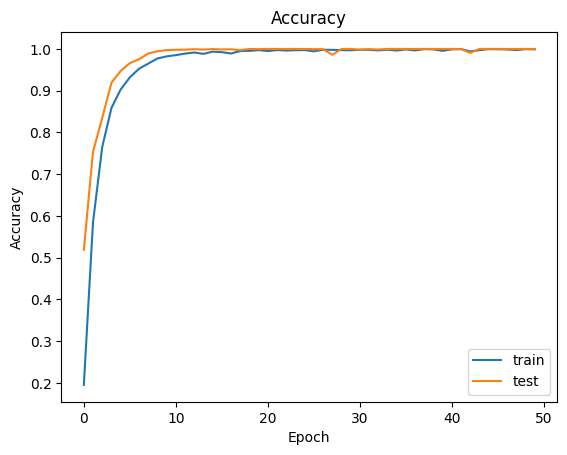

In [25]:
#Graphical Representation of Training Data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','test'])
plt.show()

In [26]:
#Reshape test data to evaluate its performance on unseen data
from sklearn.preprocessing import LabelBinarizer
test_labels = test['label'].values

test_images = train.values
test_images = np.array([np.reshape(i,(28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

label_Binary = LabelBinarizer()
labels = label_Binary.fit_transform(test_labels)

test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

test_images.shape

(27455, 28, 28, 1)

In [27]:
y_pred = model.predict(test_images)

858/858 [==============================] - 7s 8ms/step


In [28]:
test.drop('label', axis = 1, inplace = True)

In [29]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load trained model
model = load_model('Model.h5')

# Dictionary to map output to letter
letter_dict = {0: 'A',
                  1: 'B',
                  2: 'C',
                  3: 'D',
                  4: 'E',
                  5: 'F',
                  6: 'G',
                  7: 'H',
                  8: 'I',
                  9: 'K',
                  10: 'L',
                  11: 'M',
                  12: 'N',
                  13: '0',
                  14: 'P',
                  15: 'Q',
                  16: 'R',
                  17: 'S',
                  18: 'T',
                  19: 'U',
                  20: 'V',
                  21: 'W',
                  22: 'X',
                  23: 'Y'}
# Function to get label from prediction
def get_label(prediction):
    return letter_dict[np.argmax(prediction)]

# Initialize video capture
cap = cv2.VideoCapture(0)

while True:
    # Read frame from video capture
    ret, frame = cap.read()
    if not ret:
        break
    
    # Preprocess frame
    #region of interest
    roi = frame[100:400, 320:620]
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.GaussianBlur(roi, (5, 5), 0)
    roi = cv2.resize(roi, (28, 28), interpolation=cv2.INTER_AREA)
    roi = roi.reshape(1, 28, 28, 1)
#     roi = frame[100:400, 320:620]
#     roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
#     roi = cv2.GaussianBlur(roi, (5, 5), 0)
#     _, thresh = cv2.threshold(roi, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#     thresh = cv2.resize(thresh, (28, 28), interpolation=cv2.INTER_AREA)
#     thresh = np.expand_dims(thresh, axis=-1)
#     thresh = np.expand_dims(thresh, axis=0)
    
    # Make prediction on preprocessed frame
    prediction = model.predict(roi)
    label = get_label(prediction)
    
    # Display prediction on frame
    cv2.putText(frame, label, (290, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.rectangle(frame, (320, 100), (620, 400), (255, 0, 0), 5)
    cv2.imshow('frame', frame)
    
    # Exit on key press
    if cv2.waitKey(1) == ord('q'):
        break

# Release video capture and close all windows
cap.release()
cv2.destroyAllWindows()



1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 17ms/step


In [30]:
# #Match labels to data
# def getLetter(result):
#     classLables = {0: 'A',
#                   1: 'B',
#                   2: 'C',
#                   3: 'D',
#                   4: 'E',
#                   5: 'F',
#                   6: 'G',
#                   7: 'H',
#                   8: 'I',
#                   9: 'K',
#                   10: 'L',
#                   11: 'M',
#                   12: 'N',
#                   13: '0',
#                   14: 'P',
#                   15: 'Q',
#                   16: 'R',
#                   17: 'S',
#                   18: 'T',
#                   19: 'U',
#                   20: 'V',
#                   21: 'W',
#                   22: 'X',
#                   23: 'Y'}
#     try:
#         res = int(result)
#         return classLabels[res]
#     except:
#         return "Error"

TEST ON ACTUAL WEBCAM INPUT

In [31]:
# from tensorflow.keras.models import Sequential
# #Load trained model
# model = load_model('Model.h5')
# cap = cv2.VideoCapture(0)

# while True:
#     res, frame = cap.read()
#     if not res:
#         break
    
#     #region of interest
#     roi = frame[100:400, 320:620]
#     cv2.imshow('roi',roi)
#     roi = cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
#     roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    
#     cv2.imshow('roi scaled and gray', roi)
#     copy = frame.copy()
#     cv2.rectangle(copy, (320,100), (620,400), (255,0,0), 5)
    
#     roi = roi.reshape(1, 28, 28, 1)
    
#     result = model.predict(roi, 1, verbose = 0)[0]
#     cv2.putText(copy, getLetter(result), (300,100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
#     cv2.imshow('frame',copy)
    
#     if cv2.waitKey(1) == 13:
#         break

# cap.release()
# cv2.destroyAllWindows()

In [33]:
(ls,acc)=model.evaluate(x=x_test,y=y_test)

258/258 [==============================] - 2s 7ms/step - loss: 4.0437e-04 - accuracy: 0.9999


In [34]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 99.98785853385925%


CLASSIFICATION REPORT